In [ ]:
#Loading Validation Data
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
new_df = pd.read_excel('/content/Validation_CIP_03_07_2023_to_16_07_2023_granular.xlsx')
new_df = new_df[['Date', 'Time', 'Consumption']]
new_df


,Date,Time,Consumption
0,03/07/2023,00:01:00,0.0
1,03/07/2023,00:06:00,0.0
2,03/07/2023,00:11:02,0.0
3,03/07/2023,00:15:57,0.0
4,03/07/2023,00:20:57,0.0
...,...,...,...
4036,16/07/2023,23:38:04,0.0
4037,16/07/2023,23:43:04,0.0
4038,16/07/2023,23:48:04,0.0
4039,16/07/2023,23:53:03,0.0


Basic Statistics:
Mean Consumption: 0.0861024498886411
Standard Deviation of Consumption: 0.21568008578080577
Minimum Consumption: 0.0
Maximum Consumption: 1.0800000000017462
Median Consumption: 0.0
25th Percentile of Consumption: 0.0
75th Percentile of Consumption: 0.0


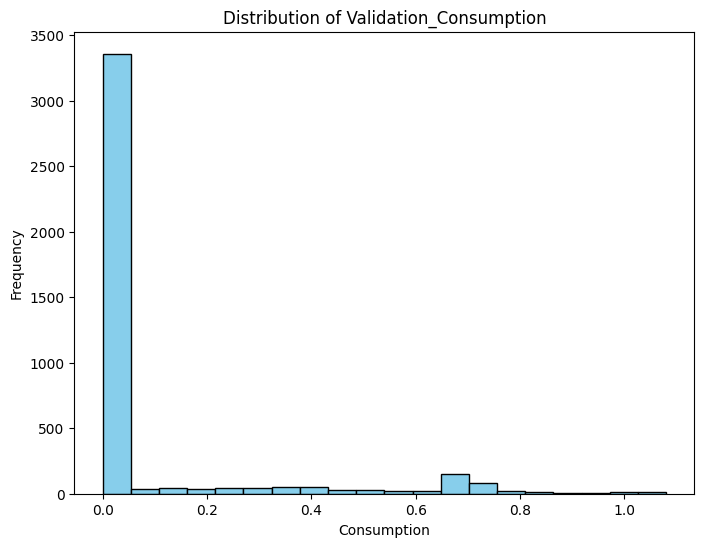

In [ ]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
# Print the basic statistics
print("Basic Statistics:")
print("Mean Consumption:",new_df['Consumption'].mean())
print("Standard Deviation of Consumption:", new_df['Consumption'].std())
print("Minimum Consumption:", new_df['Consumption'].min())
print("Maximum Consumption:", new_df['Consumption'].max())
print("Median Consumption:", new_df['Consumption'].median())
print("25th Percentile of Consumption:", new_df['Consumption'].quantile(0.25))
print("75th Percentile of Consumption:", new_df['Consumption'].quantile(0.75))
# Plot the distribution of Consumption
plt.figure(figsize=(8, 6))
plt.hist(new_df['Consumption'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Validation_Consumption')
plt.show()

In [ ]:
#importing  libraries
import pandas as pd
#Loading the unlabelled data
df = pd.read_excel('/content/CIP_01_05_2023_to_08_06_2023_granular data main.xlsx')
df = df[['Date', 'Time', 'Consumption']]
df



,Date,Time,Consumption
0,01/05/2023,00:00:25,0.64
1,01/05/2023,00:05:23,0.72
2,01/05/2023,00:10:25,0.69
3,01/05/2023,00:15:25,0.55
4,01/05/2023,00:20:26,0.52
...,...,...,...
10867,04/06/2023,23:36:13,0.04
10868,04/06/2023,23:41:12,0.00
10869,04/06/2023,23:46:11,0.00
10870,04/06/2023,23:51:12,0.00


Basic Statistics:
Mean Consumption: 0.15888704930095676
Standard Deviation of Consumption: 0.24821918092428713
Minimum Consumption: 0.0
Maximum Consumption: 1.0499999999992724
Median Consumption: 0.0
25th Percentile of Consumption: 0.0
75th Percentile of Consumption: 0.28999999999723514


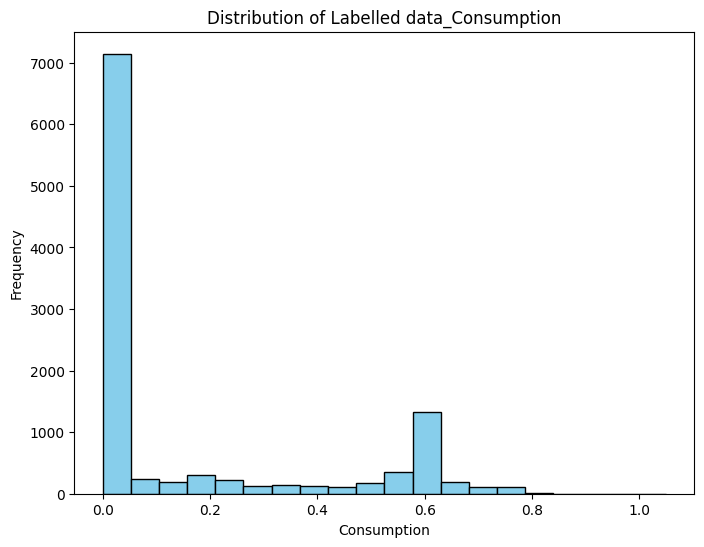

In [ ]:
#EDA
import pandas as pd
import matplotlib.pyplot as plt
# Print the basic statistics
print("Basic Statistics:")
print("Mean Consumption:", df['Consumption'].mean())
print("Standard Deviation of Consumption:", df['Consumption'].std())
print("Minimum Consumption:", df['Consumption'].min())
print("Maximum Consumption:", df['Consumption'].max())
print("Median Consumption:", df['Consumption'].median())
print("25th Percentile of Consumption:", df['Consumption'].quantile(0.25))
print("75th Percentile of Consumption:", df['Consumption'].quantile(0.75))
# Plot the distribution of Consumption
plt.figure(figsize=(8, 6))
plt.hist(df['Consumption'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Labelled data_Consumption')
plt.show()

<Figure size 800x600 with 0 Axes>

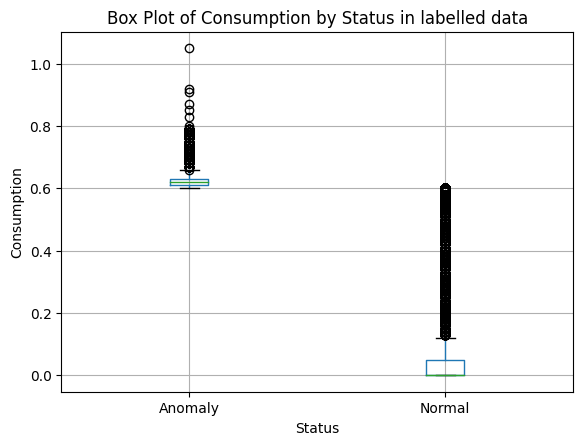

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot of 'Consumption' column in dy DataFrame grouped by 'Status'
plt.figure(figsize=(8, 6))
dy.boxplot(column='Consumption', by='Status')
plt.title('Box Plot of Consumption by Status in labelled data')
plt.suptitle("")  # Remove the default title
plt.ylabel('Consumption')
plt.xlabel('Status')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.show()


In [ ]:
# Create a new column 'Status' based on the 'Consumption' values
df['Status'] = df['Consumption'].apply(lambda x: 'Anomaly' if x > 0.60 else 'Normal')

# Save the DataFrame to an Excel file
output_file_path = 'labeled_data.xlsx'  # Replace with your desired output file path
df.to_excel(output_file_path, index=False)

In [ ]:
#Loading the manually labelled data
dy = pd.read_excel('/content/labeled_data.xlsx')
dy

,Date,Time,Consumption,Status
0,01/05/2023,00:00:25,0.64,Anomaly
1,01/05/2023,00:05:23,0.72,Anomaly
2,01/05/2023,00:10:25,0.69,Anomaly
3,01/05/2023,00:15:25,0.55,Normal
4,01/05/2023,00:20:26,0.52,Normal
...,...,...,...,...
10867,04/06/2023,23:36:13,0.04,Normal
10868,04/06/2023,23:41:12,0.00,Normal
10869,04/06/2023,23:46:11,0.00,Normal
10870,04/06/2023,23:51:12,0.00,Normal


In [ ]:
# Count the occurrences of each status label
status_counts = dy['Status'].value_counts()

# Print the counts
print("Anomalies:", status_counts['Anomaly'])
print("Normal:", status_counts['Normal'])

Anomalies: 1346
Normal: 9526


# **KNN**

<ipython-input-38-eb874c480f1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
<ipython-input-38-eb874c480f1e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()
<ipython-input-38-eb874c480f1e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

K-Nearest Neighbors (KNN) Test Results:
Precision on Test Data: 0.78
Recall on Test Data: 0.90


<ipython-input-38-eb874c480f1e>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation['Date'] = pd.to_datetime(X_validation['Date']).astype(np.int64) // 10**9
<ipython-input-38-eb874c480f1e>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation['Time'] = pd.to_timedelta(X_validation['Time']).dt.total_seconds()


Validation Data Anomaly Prediction:
Number of Anomalies Predicted: 329


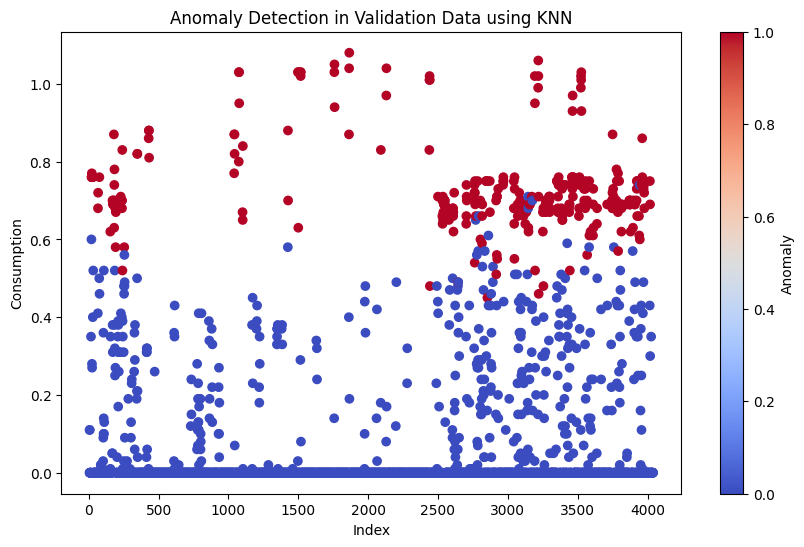

F1 Score : 0.835978835978836
Accuracy on Test Data: 0.96


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=12)

# Convert 'Date' and 'Time' columns to numerical format for labelled data
dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()

# Create lag features for labelled data
lag_range = range(1, 6)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train and test sets for labelled data
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KNN model on training data
knn_model.fit(X_train, y_train)

# Predict anomalies on the test data
y_pred_test = knn_model.predict(X_test)

# Calculate precision and recall on the test data
precision_test = precision_score(y_test, y_pred_test, pos_label='Anomaly')
recall_test = recall_score(y_test, y_pred_test, pos_label='Anomaly')

print("K-Nearest Neighbors (KNN) Test Results:")
print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")

# Convert 'Date' and 'Time' columns of validation data to numerical format
new_df['Date'] = pd.to_datetime(new_df['Date']).astype(np.int64) // 10**9
new_df['Time'] = pd.to_timedelta(new_df['Time']).dt.total_seconds()
# Create lag features in the validation data
for lag in range(1, 6):
    new_df[f'Consumption_lag_{lag}'] = new_df['Consumption'].shift(lag)

# Drop rows with missing values in the validation data
X_validation = new_df.dropna()

# Convert 'Date' and 'Time' columns of validation data to numerical format
X_validation['Date'] = pd.to_datetime(X_validation['Date']).astype(np.int64) // 10**9
X_validation['Time'] = pd.to_timedelta(X_validation['Time']).dt.total_seconds()

# Select relevant columns for validation
X_validation = X_validation[['Date', 'Time', 'Consumption'] + [f'Consumption_lag_{lag}' for lag in range(1, 6)]]

# Predict anomalies on the validation data
y_pred_validation = knn_model.predict(X_validation)

# Convert the predicted labels to boolean values
y_pred_validation_bool = (y_pred_validation == 'Anomaly')

# Count the number of anomalies predicted in the validation data
num_anomalies_validation = sum(y_pred_validation_bool)

print("Validation Data Anomaly Prediction:")
print(f"Number of Anomalies Predicted: {num_anomalies_validation}")

# Plot anomalies in validation data
plt.figure(figsize=(10, 6))
plt.scatter(X_validation.index, X_validation['Consumption'], c=y_pred_validation_bool, cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Detection in Validation Data using KNN')
plt.colorbar().set_label('Anomaly')
plt.show()

from sklearn.metrics import f1_score

# Calculate F1 score on the test data
f1_test = f1_score(y_test, y_pred_test, pos_label='Anomaly')

print("F1 Score :", f1_test)
from sklearn.metrics import precision_score, recall_score, accuracy_score
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on Test Data: {accuracy_test:.2f}")

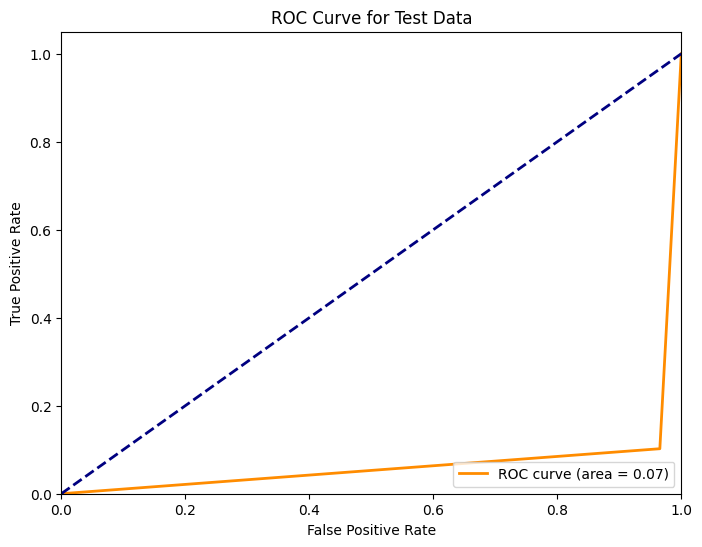

In [ ]:
# Initialize LabelEncoder and fit it on the training labels
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, confusion_matrix
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Convert string labels to numeric labels for ROC curve
y_test_numeric = label_encoder.transform(y_test)
y_pred_test_numeric = label_encoder.transform(y_pred_test)

# Calculate ROC curve and AUC for test data
fpr_test, tpr_test, _ = roc_curve(y_test_numeric, y_pred_test_numeric, pos_label=label_encoder.transform(['Anomaly'])[0])
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Converting to a excel file
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you've already predicted anomalies on the validation data and created y_pred_validation_bool

# Create a new column 'Status' in X_validation based on y_pred_validation_bool
X_validation['Status'] = ['Anomaly' if pred else 'Normal' for pred in y_pred_validation_bool]

# Save the validation data with the 'Status' column to an Excel file
X_validation.to_excel('predicted_validation_data.xlsx', index=False)


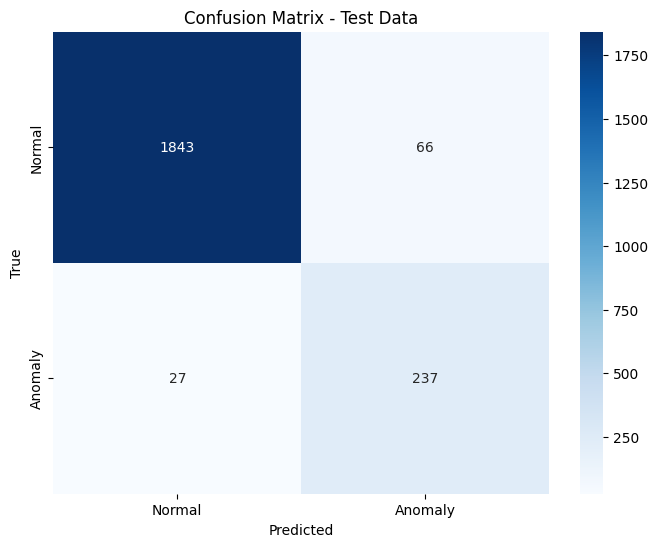

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for test data
confusion_mat = confusion_matrix(y_test, y_pred_test, labels=['Normal', 'Anomaly'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Data')
plt.show()



# **ISOLATION FOREST**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest Test Results:
Precision: 0.44
Recall: 0.09
Accuracy: 0.87


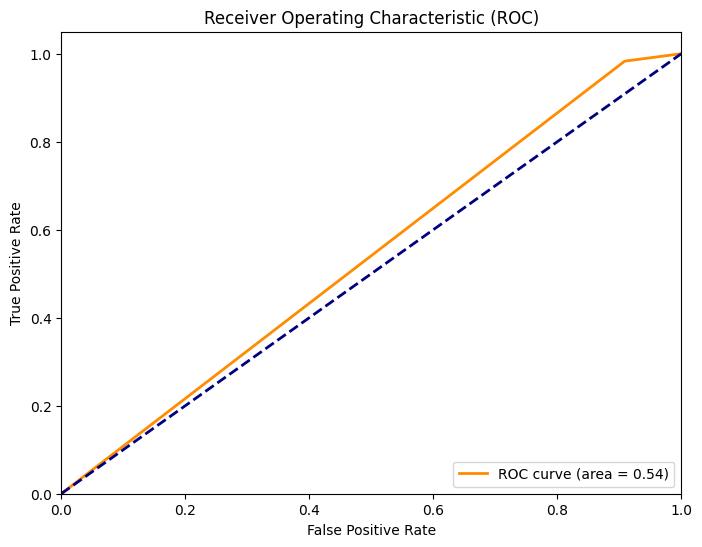

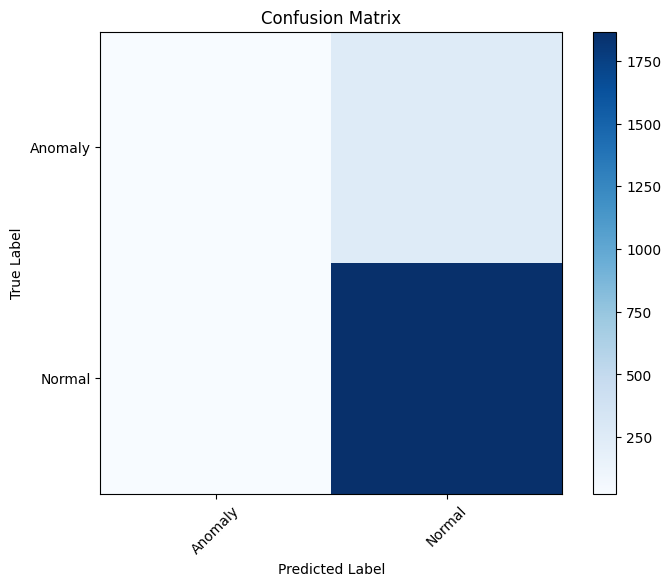

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.03, random_state=42)

# Convert 'Date' and 'Time' columns to numerical format for labeled data
dy['Date'] = pd.to_datetime(dy['Date']).astype(np.int64) // 10**9
dy['Time'] = pd.to_timedelta(dy['Time']).dt.total_seconds()

# Create lag features for labeled data
lag_range = range(1, 6)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train and test sets for labeled data
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Isolation Forest model on training data
isolation_forest_model.fit(X_train)

# Predict anomalies on the test data
y_pred_test = isolation_forest_model.predict(X_test)

# Convert predictions to binary labels ('Normal' or 'Anomaly')
y_pred_test_labels = ['Anomaly' if pred == -1 else 'Normal' for pred in y_pred_test]

# Calculate precision, recall, and accuracy on the test data
precision = precision_score(y_test, y_pred_test_labels, pos_label='Anomaly')
recall = recall_score(y_test, y_pred_test_labels, pos_label='Anomaly')
accuracy = accuracy_score(y_test, y_pred_test_labels)

print("Isolation Forest Test Results:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numeric labels
y_test_numeric = label_encoder.fit_transform(y_test)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test_labels, labels=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


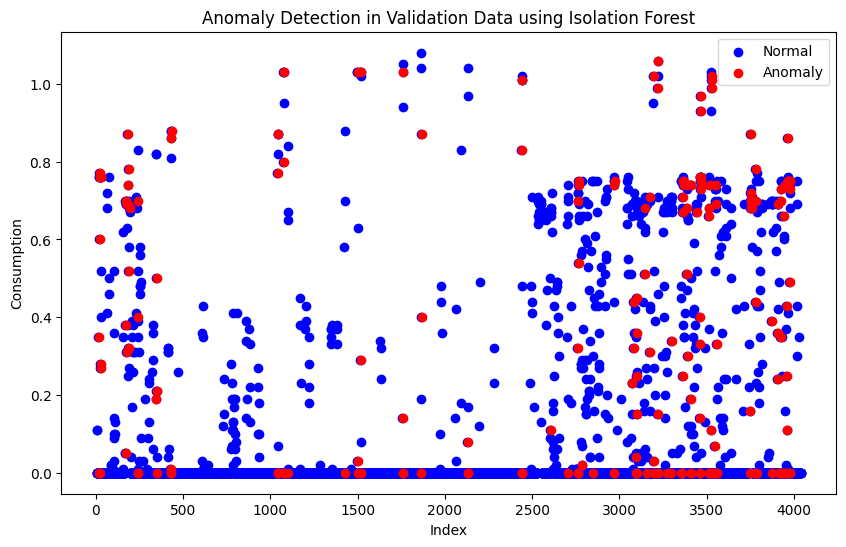

In [ ]:
# Convert 'Date' and 'Time' columns to numerical format for validation data
new_df['Date'] = pd.to_datetime(new_df['Date']).astype(np.int64) // 10**9
new_df['Time'] = pd.to_timedelta(new_df['Time']).dt.total_seconds()

# Create lag features for validation data
for lag in range(1, 6):
    new_df[f'Consumption_lag_{lag}'] = new_df['Consumption'].shift(lag)

# Drop rows with missing values in validation data
X_validation = new_df.dropna()

# Ensure the columns in validation data match the columns used during training
X_validation = X_validation[X.columns]

# Predict anomalies on the validation data
y_pred_validation = isolation_forest_model.predict(X_validation)

# Convert predictions to binary labels ('Normal' or 'Anomaly')
y_pred_validation_labels = ['Anomaly' if pred == -1 else 'Normal' for pred in y_pred_validation]

# Plot anomalies in validation data
plt.figure(figsize=(10, 6))
plt.scatter(X_validation.index, X_validation['Consumption'], c='blue', label='Normal')
anomaly_indices = np.where(np.array(y_pred_validation_labels) == 'Anomaly')[0]
plt.scatter(X_validation.index[anomaly_indices], X_validation['Consumption'][anomaly_indices], c='red', label='Anomaly')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Detection in Validation Data using Isolation Forest')
plt.legend()
plt.show()


# **SVM & GMM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.svm import OneClassSVM
from sklearn.mixture import GaussianMixture


# Convert 'Status' column to numerical labels
label_encoder = LabelEncoder()
dy['Status'] = label_encoder.fit_transform(dy['Status'])

# Create lag features
lag_range = range(1, 6)
for lag in lag_range:
    dy[f'Consumption_lag_{lag}'] = dy['Consumption'].shift(lag)

# Drop rows with missing values
dy = dy.dropna()

# Split data into train and test sets
X = dy.drop(columns=['Status'])
y = dy['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize One-Class SVM model (multi-class)
svm_model = OneClassSVM(nu=0.03, kernel='rbf')

# Fit SVM model on training data
svm_model.fit(X_train)

# Predict anomalies on the test data
y_pred_test_svm = svm_model.predict(X_test)

# Initialize Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=2, covariance_type='full', random_state=42)

# Fit GMM model on training data
gmm_model.fit(X_train)

# Predict the likelihood of each point being in the anomaly cluster
y_likelihood_test = gmm_model.score_samples(X_test)

# Define a threshold for anomaly detection
threshold = np.percentile(y_likelihood_test, 3)  # Choose a threshold based on desired contamination rate

# Predict anomalies on the test data using the threshold
y_pred_test_gmm = (y_likelihood_test < threshold).astype(int)

# Calculate precision, recall, accuracy, and F1-score for SVM and GMM
precision_svm = precision_score(y_test, y_pred_test_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_test_svm, average='weighted')
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
f1_svm = f1_score(y_test, y_pred_test_svm, average='weighted')

precision_gmm = precision_score(y_test, y_pred_test_gmm, average='weighted')
recall_gmm = recall_score(y_test, y_pred_test_gmm, average='weighted')
accuracy_gmm = accuracy_score(y_test, y_pred_test_gmm)
f1_gmm = f1_score(y_test, y_pred_test_gmm, average='weighted')

# Print results for SVM and GMM
print(" SVM Test Results:")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")

print("\nGaussian Mixture Model Test Results:")
print(f"Precision: {precision_gmm:.2f}")
print(f"Recall: {recall_gmm:.2f}")
print(f"Accuracy: {accuracy_gmm:.2f}")
print(f"F1 Score: {f1_gmm:.2f}")


 SVM Test Results:
Precision: 0.78
Recall: 0.86
Accuracy: 0.86
F1 Score: 0.81

Gaussian Mixture Model Test Results:
Precision: 0.63
Recall: 0.14
Accuracy: 0.14
F1 Score: 0.07


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


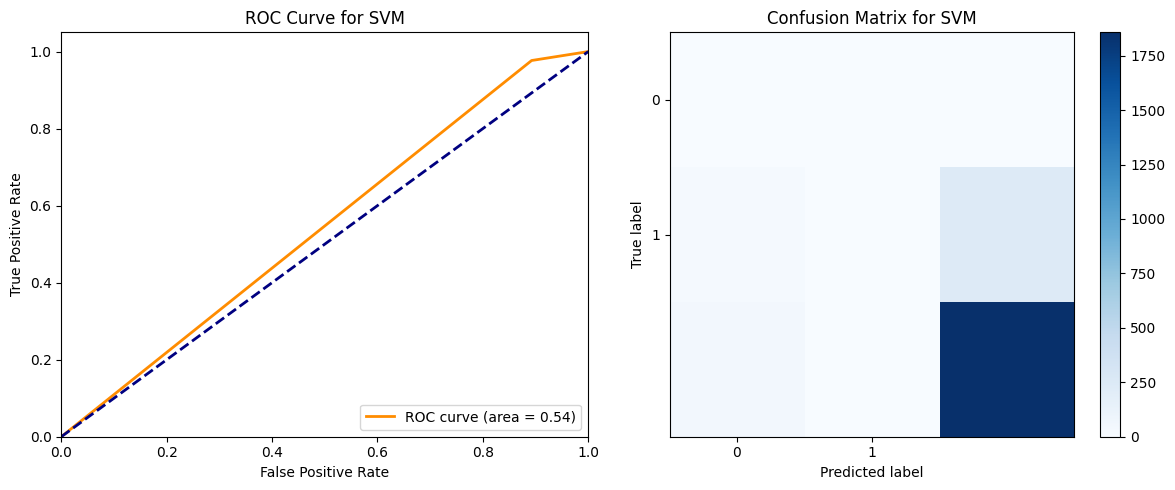

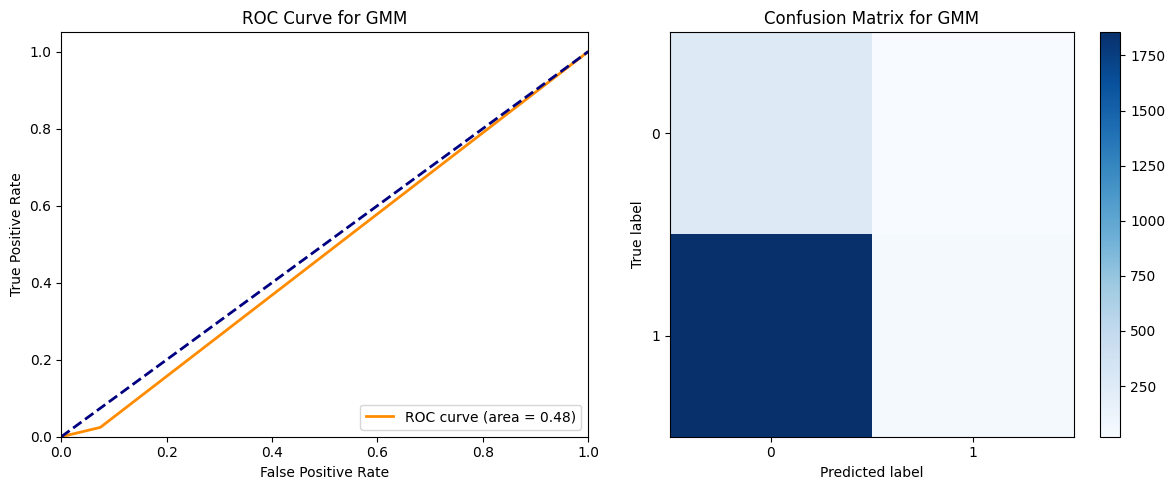

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Plot ROC curve and confusion matrix for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_test_svm, pos_label=1)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")

# Calculate confusion matrix for SVM
confusion_mat_svm = confusion_matrix(y_test, y_pred_test_svm)

plt.subplot(1, 2, 2)
plt.imshow(confusion_mat_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.colorbar()
plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

# Plot ROC curve and confusion matrix for GMM
fpr_gmm, tpr_gmm, _ = roc_curve(y_test, y_pred_test_gmm, pos_label=1)
roc_auc_gmm = auc(fpr_gmm, tpr_gmm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_gmm, tpr_gmm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gmm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GMM')
plt.legend(loc="lower right")

# Calculate confusion matrix for GMM
confusion_mat_gmm = confusion_matrix(y_test, y_pred_test_gmm)

plt.subplot(1, 2, 2)
plt.imshow(confusion_mat_gmm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for GMM')
plt.colorbar()
plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()


**PLOTTING ANOMALIES ON VALIDATION DATA -SVM**

Validation Data Anomaly Prediction (SVM):
Number of Anomalies Predicted: 267


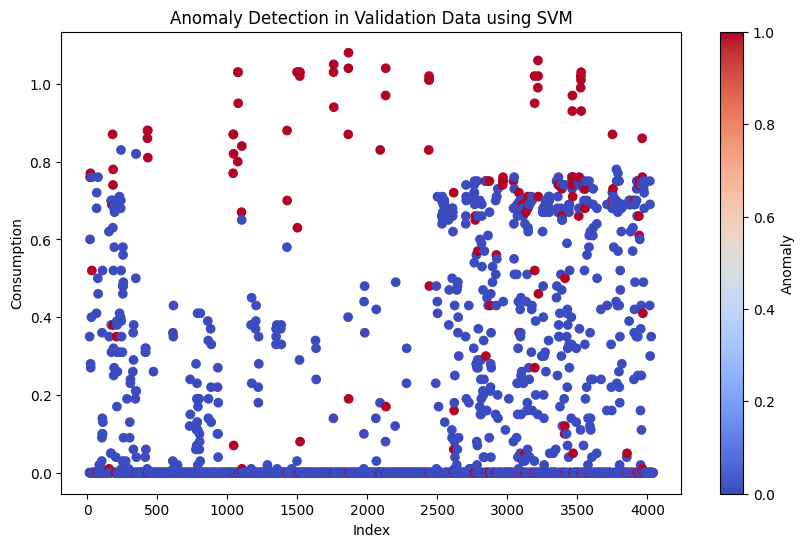

In [ ]:
import matplotlib.pyplot as plt
# Convert 'Date' and 'Time' columns of validation data to numerical format
X_validation['Date'] = pd.to_datetime(X_validation['Date']).astype(np.int64) // 10**9
X_validation['Time'] = pd.to_timedelta(X_validation['Time']).dt.total_seconds()

# Create lag features in the validation data
for lag in range(1, 6):
    X_validation[f'Consumption_lag_{lag}'] = X_validation['Consumption'].shift(lag)

# Drop rows with missing values in the validation data
X_validation = X_validation.dropna()

# Select only the features that were used during training
X_validation_subset = X_validation[X_train.columns]

# Predict anomalies using SVM model
y_pred_validation_svm = svm_model.predict(X_validation_subset)

# Count the number of anomalies predicted in the validation data
num_anomalies_validation_svm = sum(y_pred_validation_svm == -1)

print("Validation Data Anomaly Prediction (SVM):")
print(f"Number of Anomalies Predicted: {num_anomalies_validation_svm}")

# Plot anomalies in validation data
plt.figure(figsize=(10, 6))
plt.scatter(X_validation.index, X_validation['Consumption'], c=y_pred_validation_svm == -1, cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Detection in Validation Data using SVM')
plt.colorbar().set_label('Anomaly')
plt.show()

**PLOTTING ANOMALIES ON VALIDATION DATA -GMM**

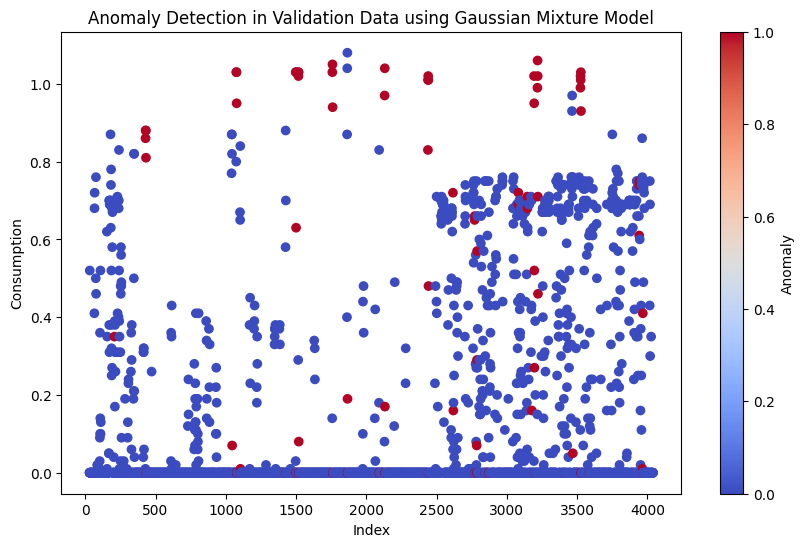

In [ ]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Fit GMM model on training data
gmm_model = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_model.fit(X_train)

# Convert 'Date' and 'Time' columns of validation data to numerical format
X_validation['Date'] = pd.to_datetime(X_validation['Date']).astype(np.int64) // 10**9
X_validation['Time'] = pd.to_timedelta(X_validation['Time']).dt.total_seconds()

# Create lag features in the validation data
for lag in range(1, 6):
    X_validation[f'Consumption_lag_{lag}'] = X_validation['Consumption'].shift(lag)

# Drop rows with missing values in the validation data
X_validation = X_validation.dropna()

# Select only the features that were used during training
X_validation_subset = X_validation[X_train.columns]

# Predict the likelihood of each point being in the anomaly cluster
y_likelihood_validation = gmm_model.score_samples(X_validation_subset)

# Define a threshold for anomaly detection
threshold = np.percentile(y_likelihood_validation, 3)  # Choose a threshold based on desired contamination rate

# Predict anomalies on the validation data using the threshold
y_pred_validation_gmm = (y_likelihood_validation < threshold).astype(int)

# Plot anomalies in validation data
plt.figure(figsize=(10, 6))
plt.scatter(X_validation.index, X_validation['Consumption'], c=y_pred_validation_gmm, cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.title('Anomaly Detection in Validation Data using Gaussian Mixture Model')
plt.colorbar().set_label('Anomaly')
plt.show()
